# **Ejemplo de análisis univariado**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 1) Vista rápida: nulos y resumen numérico
print("Nulos en age:", df["age"].isna().sum())
print(df["age"].describe())

Nulos en age: 177
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [ ]:
# 2) Medidas principales (más explícitas para explicar)
age = df["age"].dropna()
print("\nMedidas:")
print("Media:", round(age.mean(), 2))
print("Mediana:", round(age.median(), 2))
print("Desv. estándar:", round(age.std(), 2))


Medidas:
Media: 29.7
Mediana: 28.0
Desv. estándar: 14.53


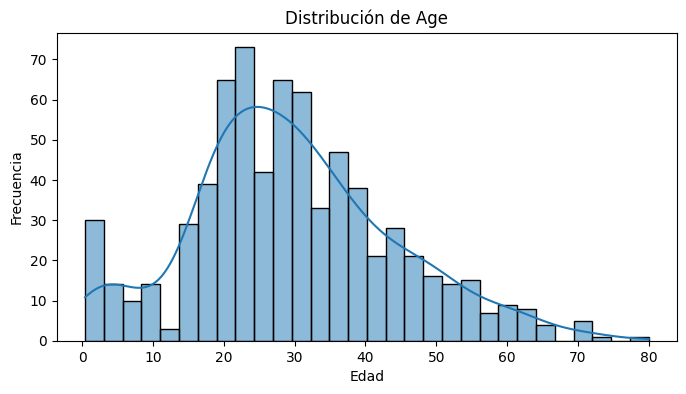

In [ ]:

# 3) Visualización de distribución
plt.figure(figsize=(8,4))
sns.histplot(age, bins=30, kde=True)
plt.title("Distribución de Age")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

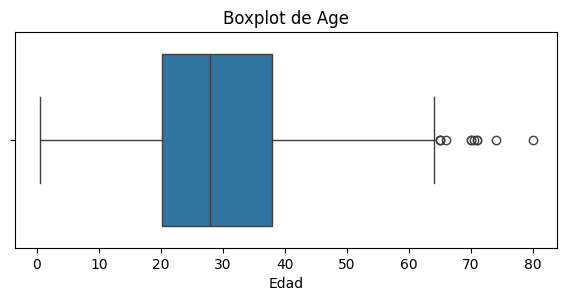

In [ ]:
# 4) Boxplot para ver dispersión y posibles outliers
plt.figure(figsize=(7,2.8))
sns.boxplot(x=age)
plt.title("Boxplot de Age")
plt.xlabel("Edad")
plt.show()

In [ ]:
# 5) Outliers con regla IQR (clásica en EDA)
q1 = age.quantile(0.25)
q3 = age.quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = age[(age < lim_inf) | (age > lim_sup)]

print("\nRegla IQR:")
print("Q1:", q1, "| Q3:", q3, "| IQR:", iqr)
print("Límite inferior:", round(lim_inf, 2), "| Límite superior:", round(lim_sup, 2))
print("Cantidad de outliers:", outliers.shape[0])
print("Outliers (top 10):")
print(outliers.sort_values().head(10))


Regla IQR:
Q1: 20.125 | Q3: 38.0 | IQR: 17.875
Límite inferior: -6.69 | Límite superior: 64.81
Cantidad de outliers: 11
Outliers (top 10):
54     65.0
280    65.0
456    65.0
33     66.0
745    70.0
672    70.0
116    70.5
96     71.0
493    71.0
851    74.0
Name: age, dtype: float64
